In [1]:
import numpy as np
import pandas as pd

In [3]:
csv_file = 'admission_predict.csv'

df = pd.read_csv(csv_file, index_col=[0])

In [4]:
df.shape

(400, 8)

In [5]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


## Define all libraries and functions needed

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import optimizers
from keras.regularizers import l2

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import seaborn as sns
import matplotlib.pyplot as plt

def scale(X, decimals):
    return np.round((X - np.mean(X, axis=0))/ np.std(X, axis=0), decimals=decimals)

/Users/heyuhao/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Data Preperation

In [9]:
seed = 10

np.random.seed(seed)

data = df.values
np.random.shuffle(data)

X = data[:, :-1]
y = data[:, -1].reshape(-1,1)

X = scale(X, 4)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train, X_test, y_train, y_test = np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

np.save('./npy/X_train.npy', X_train)
np.save('./npy/X_test.npy', X_test)
np.save('./npy/y_train.npy', y_train)
np.save('./npy/y_test.npy', y_train)

(280, 7) (120, 7) (280, 1) (120, 1)


## Q1

100 0.030518891910711925
200 0.023322579202552637
300 0.020108519494533537
400 0.018418519757688046
500 0.017326726391911507
600 0.01652915986875693
700 0.015884147336085636
800 0.015343563755353291
900 0.01491675538321336
1000 0.014534168504178524
1100 0.014195738174021245
1200 0.013885915900270144
1300 0.013607095492382844
1400 0.013354699003199737
1500 0.01312381240228812
1600 0.012910402938723564
1700 0.012704938681175311
1800 0.012517576944082976
1900 0.012349232534567515
2000 0.012190236741056045
2100 0.012047051390012106
2200 0.01191561141361793
2300 0.011788671494772036
2400 0.011660834650198619
2500 0.01153324053933223
2600 0.011411376328517993
2700 0.011292856776465972
2800 0.011178157354394595
2900 0.011063460415850082
3000 0.010953217496474583
3100 0.010847593688716491
3200 0.010748043035467466
3300 0.010653637070208787
3400 0.010561554320156574
3500 0.010476255385826031
3600 0.010392542090266943
3700 0.01030682281901439
3800 0.010225443573047718
3900 0.010146649554371834
4

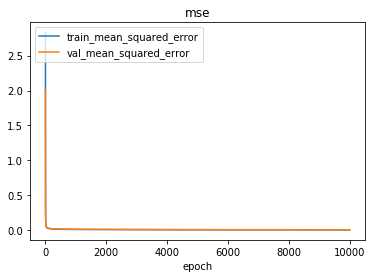

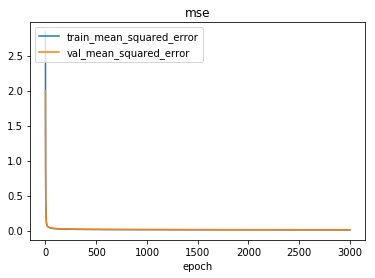

In [11]:
#a)

lr = 1e-3
decay = 1e-3
batch_size = 8
epochs = 10000
epochs_interval =100
early_stop_threshold = 1e-2

model = Sequential([
    Dense(10, input_dim=X_train.shape[1], activation='relu', kernel_initializer='lecun_normal', kernel_regularizer=l2(decay)),
    Dense(y_train.shape[1], kernel_initializer='he_normal', kernel_regularizer=l2(decay))
    ])

model.compile(optimizer=optimizers.SGD(lr=lr),
                  loss='mse')

train_loss=[100]
val_loss=[100]
early_stop=0

for i in range(epochs//epochs_interval):
    h = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs_interval, verbose=0, validation_data=(X_test, y_test), shuffle=True)
    train_loss.extend(h.history['loss'])
    val_loss.extend(h.history['val_loss'])
    print(epochs_interval*(i+1),val_loss[-1])
    
#     if val loss increase less than early stop thrshold, then stop
    if val_loss[-1] * (1+early_stop_threshold) > val_loss[-100] and early_stop==0:
        early_stop = epochs_interval*(i+1)
        

plt.figure()
plt.plot(train_loss[1:])
plt.plot(val_loss[1:])
plt.title('mse')
plt.xlabel('epoch')
plt.legend(['train_mean_squared_error', 'val_mean_squared_error',], loc='upper left')


plt.figure()
plt.plot(train_loss[1:early_stop])
plt.plot(val_loss[1:early_stop])
plt.title('mse')
plt.xlabel('epoch')
plt.legend(['train_mean_squared_error', 'val_mean_squared_error',], loc='upper left')
plt.show()

(50, 7) (50, 1)
mean root square error:  0.0689779303188416


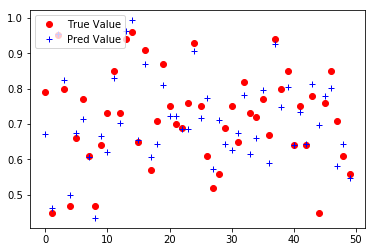

In [8]:
# c)
_, X_test_50, _, y_test_50 = train_test_split(X_test, y_test, test_size=50, random_state=42)
print(X_test_50.shape, y_test_50.shape)

y_pred_50 = model.predict(x=X_test_50)
print('mean root square error: ', np.sqrt(mean_squared_error(y_test_50, y_pred_50)))

plt.figure()
plt.plot(y_test_50, 'ro')
plt.plot(y_pred_50, 'b+')
plt.legend(['True Value', 'Pred Value',], loc='upper left')

## Q2.Correlation Matrix

In [14]:
df.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


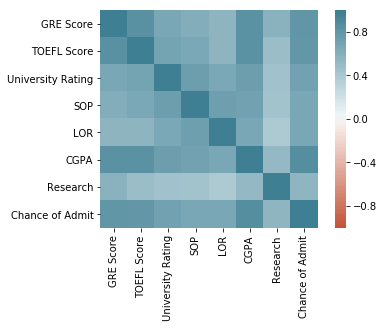

In [15]:
corr = df.corr()

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)


In [16]:
#a) most correlated features
max_corr_extent=0
max_corr_index=(-1,-1)
for i in range(len(corr)-1):
    for j in range(i+1, len(corr)-1):
        if corr.iloc[i,j] > max_corr_extent:
            max_corr_extent = corr.iloc[i,j]
            max_corr_index=(i,j)
            
corr.columns[max_corr_index[0]], corr.columns[max_corr_index[1]], max_corr_extent

('GRE Score', 'TOEFL Score', 0.8359768030143953)

In [17]:
#b) 
related_feature_of_admit = [(corr.columns[i], corr.iloc[-1, i]) for i in (np.argsort(corr.iloc[-1,:-1].tolist())[::-1])]
related_feature_of_admit[0]

('CGPA', 0.8732890993553011)

## Q3 Recuisive Feature Elimination

In [10]:
#a) keep 6 features

features = list(df.columns)[:-1]
print(features, '\n')

mse = dict(zip(features, [0 for i in features]))

epochs=2800

for i in range(len(features)):
    
    excluded_feature = features[i]
    
    print(f'\nremoved {excluded_feature}...')
    print(f'feature kept: {[f for f in features if f!=excluded_feature]}')
    
    X_train_removed, X_test_removed = np.delete(X_train, obj=i, axis=1), np.delete(X_test, obj=i, axis=1)
    
    print(f'training shape: {X_train_removed.shape}')
    
    model = Sequential([
    Dense(10, input_dim=X_train_removed.shape[1], activation='relu', kernel_initializer='lecun_normal', kernel_regularizer=l2(decay)),
    Dense(y_train.shape[1], kernel_initializer='he_normal', kernel_regularizer=l2(decay))
    ])

    model.compile(optimizer=optimizers.SGD(lr=lr),
                  loss='mse')

    h = model.fit(X_train_removed, y_train, batch_size=batch_size, epochs=epochs, verbose=0, validation_data=(X_test_removed, y_test), shuffle=True)
    
    mse[excluded_feature] = h.history['val_loss'][-1]
    
    print(f'mse: {mse[excluded_feature]}')
    
mse

['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research'] 


removed GRE Score...
feature kept: ['TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research']
training shape: (280, 6)
mse: 0.01006181004146735

removed TOEFL Score...
feature kept: ['GRE Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research']
training shape: (280, 6)
mse: 0.014574812538921834

removed University Rating...
feature kept: ['GRE Score', 'TOEFL Score', 'SOP', 'LOR', 'CGPA', 'Research']
training shape: (280, 6)
mse: 0.01132212948674957

removed SOP...
feature kept: ['GRE Score', 'TOEFL Score', 'University Rating', 'LOR', 'CGPA', 'Research']
training shape: (280, 6)
mse: 0.011093617292741935

removed LOR...
feature kept: ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'CGPA', 'Research']
training shape: (280, 6)
mse: 0.01304549981529514

removed CGPA...
feature kept: ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'Research']
training shape: (280

{'GRE Score': 0.01006181004146735,
 'TOEFL Score': 0.014574812538921834,
 'University Rating': 0.01132212948674957,
 'SOP': 0.011093617292741935,
 'LOR': 0.01304549981529514,
 'CGPA': 0.013039059502383073,
 'Research': 0.012719061908622582}

In [16]:
# if after removed feature1, then the mse is low, then feature1 is not importrant
feature_to_be_removed = min(mse, key=mse.get)
print('remove ', feature_to_be_removed)

#feature1 - features after removing 1 feature
features1 = features.copy()
features1.remove(feature_to_be_removed)
print(features1)

feature_removed_col=np.argmin(list(mse.values()))
X_train1, X_test1 = np.delete(X_train, obj=feature_removed_col, axis=1), np.delete(X_test, obj=feature_removed_col, axis=1)
X_train1.shape, X_test1.shape

remove,  GRE Score
['TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research']


((280, 6), (120, 6))

In [ ]:
# removed feature is GRE Score

# the reason might be 
# ('GRE Score', 'TOEFL Score', 0.8359768030143953)
# high correlation

In [ ]:
# remove second feature

In [20]:
mse1 = dict(zip(features1, [0 for i in features1]))

epochs=2800

for i in range(len(features1)):
    
    excluded_feature = features1[i]
    
    print(f'\nremoved {excluded_feature}...')
    print(f'feature kept: {[f for f in features1 if f!=excluded_feature]}')
    
    X_train_removed, X_test_removed = np.delete(X_train1, obj=i, axis=1), np.delete(X_test1, obj=i, axis=1)
    
    print(f'training shape: {X_train_removed.shape}')
    
    model = Sequential([
    Dense(10, input_dim=X_train_removed.shape[1], activation='relu', kernel_initializer='lecun_normal', kernel_regularizer=l2(decay)),
    Dense(y_train.shape[1], kernel_initializer='he_normal', kernel_regularizer=l2(decay))
    ])

    model.compile(optimizer=optimizers.SGD(lr=lr),
                  loss='mse')

    h = model.fit(X_train_removed, y_train, batch_size=batch_size, epochs=epochs, verbose=0, validation_data=(X_test_removed, y_test), shuffle=True)
    
    mse1[excluded_feature] = h.history['val_loss'][-1]
    
    print(f'mse: {mse1[excluded_feature]}')
    
mse1


removed TOEFL Score...
feature kept: ['University Rating', 'SOP', 'LOR', 'CGPA', 'Research']
training shape: (280, 5)
mse: 0.012207423740377029

removed University Rating...
feature kept: ['TOEFL Score', 'SOP', 'LOR', 'CGPA', 'Research']
training shape: (280, 5)
mse: 0.015514141879975796

removed SOP...
feature kept: ['TOEFL Score', 'University Rating', 'LOR', 'CGPA', 'Research']
training shape: (280, 5)
mse: 0.011512114821622768

removed LOR...
feature kept: ['TOEFL Score', 'University Rating', 'SOP', 'CGPA', 'Research']
training shape: (280, 5)
mse: 0.012567080433170001

removed CGPA...
feature kept: ['TOEFL Score', 'University Rating', 'SOP', 'LOR', 'Research']
training shape: (280, 5)
mse: 0.012626465223729611

removed Research...
feature kept: ['TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA']
training shape: (280, 5)
mse: 0.010937654847900073


{'TOEFL Score': 0.012207423740377029,
 'University Rating': 0.015514141879975796,
 'SOP': 0.011512114821622768,
 'LOR': 0.012567080433170001,
 'CGPA': 0.012626465223729611,
 'Research': 0.010937654847900073}

In [21]:
feature_to_be_removed = min(mse1, key=mse1.get)
print('remove ', feature_to_be_removed)

#feature1 - features after removing 1 feature
features2 = features1.copy()
features2.remove(feature_to_be_removed)
print(features2)

feature_removed_col=np.argmin(list(mse1.values()))
X_train2, X_test2 = np.delete(X_train1, obj=feature_removed_col, axis=1), np.delete(X_test1, obj=feature_removed_col, axis=1)
X_train2.shape, X_test2.shape

remove  Research
['TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA']


((280, 5), (120, 5))

In [ ]:
# removed feature is Research

# the reason might be 
# low correlation with y

## Q4

In [23]:
removed_features = ['GRE Score', 'Research']
removed_columns_index=[]
for f in removed_features:
    removed_columns_index.append(df.columns.tolist().index(f))
removed_columns_index.sort()

X_train2, X_test2 = np.delete(X_train, obj=removed_columns_index, axis=1), np.delete(X_test, obj=removed_columns_index, axis=1)

X_train2.shape, X_test2.shape

((280, 5), (120, 5))

In [ ]:
# X_train2, X_test2 is used in Q4

************************************************** 0 **************************************************
100 0.05820879191160202
200 0.02908623665571213
300 0.021949484013020992
400 0.019116061305006347
500 0.017625226887563863
600 0.01671932122359673
700 0.016107381818195186
800 0.01564805203427871
900 0.015259322648247083
1000 0.014932026465733847
1100 0.014649065273503462
1200 0.014400549543400606
1300 0.014174677555759747
1400 0.013970381890734037
1500 0.013773343029121558
1600 0.013593074431022008
1700 0.013423258004089196
1800 0.013264291547238826
1900 0.013115029285351435
2000 0.012972949693600336
2100 0.01283657792955637
2200 0.012706901443501313
2300 0.012581565976142883
************************************************** 1 **************************************************
100 0.16022498806317648
200 0.1525528500477473
300 0.14908570448557537
400 0.14650427798430124
500 0.14415556887785594
600 0.14198189576466877
700 0.13991286853949228
800 0.1379244347413381
900 0.135998185475

13200 0.0284192589422067
13300 0.028104409823815027
13400 0.027792354176441828
13500 0.027492495626211165
13600 0.02719349190592766
13700 0.026898174732923507
13800 0.026607357586423557
13900 0.026324376091361047
14000 0.02604402539630731
14100 0.025762691597143807
14200 0.025484146922826766
14300 0.025216186046600343
14400 0.02494897407790025
14500 0.02468532000978788
14600 0.024427708114186923
14700 0.024170573924978574
14800 0.023922298848629
14900 0.023673400282859802
15000 0.023428828890124955
15100 0.023185014352202417
15200 0.022951802983880044
15300 0.022718247771263123
15400 0.02247995138168335
15500 0.022249555587768553
15600 0.02202219838897387
15700 0.021795631448427836
15800 0.02157909907400608
15900 0.0213618203997612
16000 0.021150008837382
16100 0.020942890892426173
************************************************** 3 **************************************************
100 0.2627333482106527
200 0.25499875148137413
300 0.24986877342065175
400 0.2455801715453466
500 0.241

10000 0.06549032082160314
10100 0.0646671861410141
10200 0.06386109615365664
10300 0.06305901035666465
10400 0.06228732268015544
10500 0.06151429116725922
10600 0.06075064167380333
10700 0.059988186011711755
10800 0.059239589422941205
10900 0.0585157573223114
11000 0.057793804258108136
11100 0.0570786289870739
11200 0.05637967387835185
11300 0.05569277952114741
11400 0.055010894189278285
11500 0.05433531577388446
11600 0.05366456260283788
11700 0.05301598086953163
11800 0.05237354238828023
11900 0.05175021861990293
12000 0.051121468842029574
12100 0.05049993346134821
12200 0.049903188397487
12300 0.049297932038704556
12400 0.048709082106749214
12500 0.04812444349129995
12600 0.047548835476239525
12700 0.046983635425567626
12800 0.04643076757589976
12900 0.045881075163682304
13000 0.04534562801321348
13100 0.044810811430215834
13200 0.044284694641828534
13300 0.04376236523191134
13400 0.04325570936004321
13500 0.0427458015580972
13600 0.0422504760324955
13700 0.04175818959871928
13800 0

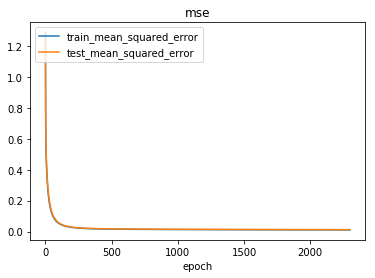

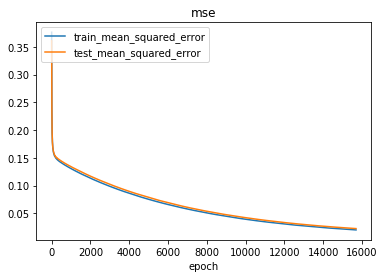

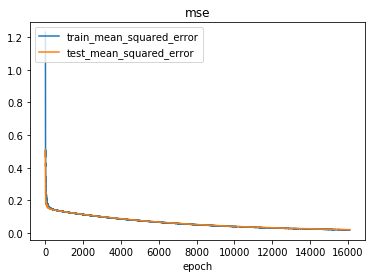

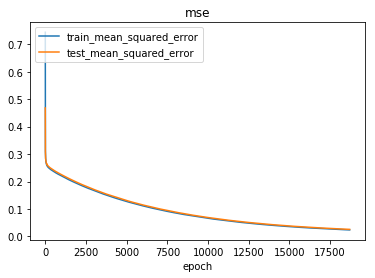

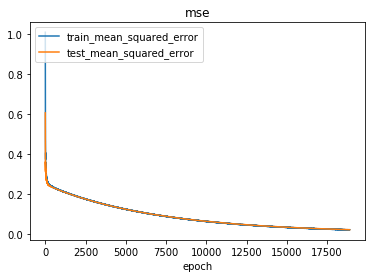

In [37]:

decay = 1e-3

model_layer3_without_dropout = Sequential([
    Dense(10, input_dim=X_train2.shape[1], activation='relu', kernel_initializer='lecun_normal', kernel_regularizer=l2(decay)),
    Dense(y_train.shape[1], kernel_initializer='he_normal', kernel_regularizer=l2(decay))
    ])

model_layer4_without_dropout = Sequential([
    
    Dense(50, input_dim=X_train2.shape[1], activation='relu', kernel_initializer='lecun_normal', kernel_regularizer=l2(decay)),
    
    Dense(50, activation='relu', kernel_initializer='he_normal', kernel_regularizer=l2(decay)),
    
    Dense(y_train.shape[1], kernel_initializer='he_normal', kernel_regularizer=l2(decay))
    ])

model_layer4_with_dropout = Sequential([
    
    Dense(50, input_dim=X_train2.shape[1], activation='relu', kernel_initializer='lecun_normal', kernel_regularizer=l2(decay)),
    
    Dropout(rate=0.2),
    
    Dense(50, activation='relu', kernel_initializer='he_normal', kernel_regularizer=l2(decay)),
    
    Dropout(rate=0.2),
    
    Dense(y_train.shape[1], kernel_initializer='he_normal', kernel_regularizer=l2(decay))
    ])
    
model_layer5_without_dropout = Sequential([
    
    Dense(50, input_dim=X_train2.shape[1], activation='relu', kernel_initializer='lecun_normal', kernel_regularizer=l2(decay)),
    
    Dense(50, activation='relu', kernel_initializer='he_normal', kernel_regularizer=l2(decay)),
    
    Dense(50, activation='relu', kernel_initializer='he_normal', kernel_regularizer=l2(decay)),
    
    Dense(y_train.shape[1], kernel_initializer='he_normal', kernel_regularizer=l2(decay))
    ])

model_layer5_with_dropout = Sequential([
    
    Dense(50, input_dim=X_train2.shape[1], activation='relu', kernel_initializer='lecun_normal', kernel_regularizer=l2(decay)),
    
    Dropout(rate=0.2),
    
    Dense(50, activation='relu', kernel_initializer='he_normal', kernel_regularizer=l2(decay)),
    
    Dropout(rate=0.2),
    
    Dense(50, activation='relu', kernel_initializer='he_normal', kernel_regularizer=l2(decay)),
    
    Dropout(rate=0.2),
    
    Dense(y_train.shape[1], kernel_initializer='he_normal', kernel_regularizer=l2(decay))
    ])
    
    
model_layer4_without_dropout.compile(optimizer=optimizers.SGD(lr=lr),
                  loss='mse')

model_layer4_with_dropout.compile(optimizer=optimizers.SGD(lr=lr),
                  loss='mse')

model_layer5_without_dropout.compile(optimizer=optimizers.SGD(lr=lr),
                  loss='mse')

model_layer5_with_dropout.compile(optimizer=optimizers.SGD(lr=lr),
                  loss='mse')


epochs=20000
epochs_interval =100
batch_size=8
early_stop_threshold = 1e-2
lr=1e-3

models = [model_layer3_without_dropout ,model_layer4_without_dropout, model_layer4_with_dropout, model_layer5_without_dropout, model_layer5_with_dropout]


train_loss = [[] for i in range(5)]
val_loss = [[] for i in range(5)]

for index, m in enumerate(models):
    
    print('*'*50, index, '*'*50,)
    
    m.compile(optimizer=optimizers.SGD(lr=lr),
                  loss='mse')
    
    epoch_interval_val_loss=[100]
    
    for i in range(epochs//epochs_interval):
        
        h = m.fit(X_train2, y_train, batch_size=batch_size, epochs=epochs_interval, verbose=0, validation_data=(X_test2, y_test), shuffle=True)
        
        train_loss[index].extend(h.history['loss'])
        val_loss[index].extend(h.history['val_loss'])
        
        # for early stop
        epoch_interval_val_loss.append(h.history['val_loss'][-1])
        print(epochs_interval*(i+1),epoch_interval_val_loss[-1])

        if epoch_interval_val_loss[-1] * (1+early_stop_threshold) > epoch_interval_val_loss[-2]:
            break
            
            
    
for i in range(5):
    plt.figure()
    plt.plot(train_loss[i])
    plt.plot(val_loss[i])
    plt.title('mse')
    plt.xlabel('epoch')
    plt.legend(['train_mean_squared_error', 'test_mean_squared_error',], loc='upper left')


In [38]:
# .012 2300 -> 15700 
# .022 15700

In [46]:
models_str = ['model_layer3_without_dropout', 'model_layer4_without_dropout', 'model_layer4_with_dropout', 'model_layer5_without_dropout', 'model_layer5_with_dropout']

with open ('q4.txt', 'w') as f:
    for i in range(len(models_str)):
        f.write('*'*20 + '  ' + models_str[i] +'  '+ '*'*20 + '\n\n')
        f.write('epoch train_loss test_loss\n\n')
        for epoch in range(len(train_loss[i])):
            f.write('{} {} {}\n'.format(epoch+1, train_loss[i][epoch], val_loss[i][epoch]))
        f.write('\n\n\n')